In [1]:
from xcube.api.readwrite import read_cube
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ds = read_cube('http://obs.eu-de.otc.t-systems.com/dcs4cop-obs-01/dcs4cop-bc-olci-sns-l2c-v1-2017.zarr')

In [5]:
ds

<xarray.Dataset>
Dimensions:         (bnds: 2, lat: 5632, lon: 10240, time: 1479)
Coordinates:
  * lat             (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.0 48.0
    lat_bnds        (lat, bnds) float64 dask.array<shape=(5632, 2), chunksize=(5632, 2)>
  * lon             (lon) float64 -16.0 -16.0 -15.99 ... 10.66 10.66 10.67
    lon_bnds        (lon, bnds) float64 dask.array<shape=(10240, 2), chunksize=(10240, 2)>
  * time            (time) datetime64[ns] 2017-01-01T09:57:21.976840192 ... 2017-12-31T11:01:54.808396032
    time_bnds       (time, bnds) datetime64[ns] dask.array<shape=(1479, 2), chunksize=(1, 2)>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc       (time, lat, lon) float64 dask.array<shape=(1479, 5632, 10240), chunksize=(1, 704, 640)>
    tsm_c2rcc       (time, lat, lon) float64 dask.array<shape=(1479, 5632, 10240), chunksize=(1, 704, 640)>
    tur_nechad_665  (time, lat, lon) float64 dask.array<shape=(1479, 5632, 10240), chunksize=(1, 704, 6

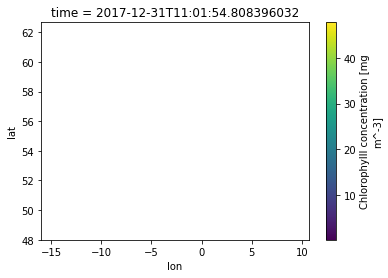

In [13]:
ds.chl_c2rcc.isel(time=-1).plot.imshow()

In [11]:
ds.chl_c2rcc.sel(time='2017-09-16', method='nearest')

<xarray.DataArray 'chl_c2rcc' (time: 2, lat: 5632, lon: 10240)>
dask.array<shape=(2, 5632, 10240), dtype=float64, chunksize=(1, 704, 640)>
Coordinates:
  * lat      (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.01 48.0 48.0
  * lon      (lon) float64 -16.0 -16.0 -15.99 -15.99 ... 10.66 10.66 10.66 10.67
  * time     (time) datetime64[ns] 2017-09-16T10:05:21.087274496 2017-09-16T10:06:56.622432
Attributes:
    color_table_blue_values:    [128, 255, 255, 255, 255, 0, 0, 0, 0, 0]
    color_table_green_values:   [0, 0, 102, 204, 255, 128, 255, 95, 0, 0]
    color_table_red_values:     [0, 0, 51, 0, 0, 0, 255, 255, 215, 150]
    color_table_sample_values:  [0.0, 0.5, 1.0, 2.0, 3.0, 4.5, 13.0, 25.0, 30...
    long_name:                  Chlorophylll concentration
    original_name:              conc_chl
    sample_frequencies:         [5653, 1366, 704, 637, 485, 620, 493, 378, 29...
    spatial_resampling:         Nearest
    statistics:                 [0.016437947750091553, 109.519165

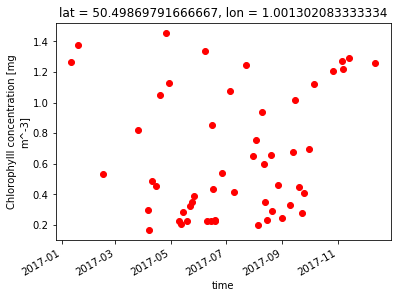

In [14]:
ds.chl_c2rcc.sel(lon=1., lat=50.5, method='nearest').plot.line('r-o')

In [15]:
chl_w = ds.chl_c2rcc.resample(time='1W').mean(dim='time')

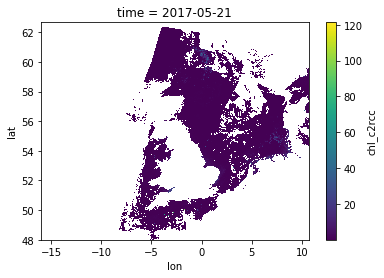

In [16]:
chl_w.isel(time=20).plot.imshow()

In [17]:
chl_w_ts = chl_w.sel(lon=1., lat=50.5, method='nearest')

In [18]:
chl_w_ts.load()

<xarray.DataArray 'chl_c2rcc' (time: 53)>
array([     nan,      nan, 1.262843, 1.378952,      nan,      nan,      nan,
       0.534861,      nan,      nan,      nan,      nan, 0.820698,      nan,
       0.229722, 0.47177 , 1.048609, 1.291423,      nan, 0.237664, 0.220805,
       0.352114,      nan, 0.778686, 0.436718, 0.223545, 0.540692, 0.744283,
            nan, 1.245652, 0.650578, 0.476505, 0.629414, 0.392754, 0.457233,
       0.244396, 0.329831, 0.847618, 0.377509, 0.695155, 1.123288,      nan,
            nan, 1.203992, 1.271227, 1.217144, 1.293659,      nan,      nan,
            nan, 1.256888,      nan,      nan])
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 2017-01-08 ... 2017-12-31
    lat      float64 50.5
    lon      float64 1.001

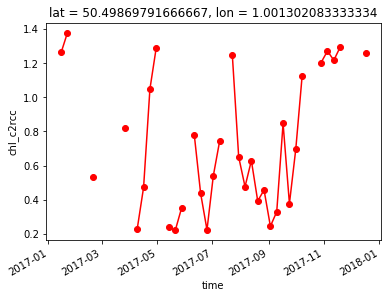

In [19]:
chl_w_ts.plot.line('r-o')

In [20]:
chl_w_ts_clean = chl_w_ts.where(~np.isnan(chl_w_ts), drop=True)

In [21]:
chl_w_ts_clean

<xarray.DataArray 'chl_c2rcc' (time: 33)>
array([1.262843, 1.378952, 0.534861, 0.820698, 0.229722, 0.47177 , 1.048609,
       1.291423, 0.237664, 0.220805, 0.352114, 0.778686, 0.436718, 0.223545,
       0.540692, 0.744283, 1.245652, 0.650578, 0.476505, 0.629414, 0.392754,
       0.457233, 0.244396, 0.329831, 0.847618, 0.377509, 0.695155, 1.123288,
       1.203992, 1.271227, 1.217144, 1.293659, 1.256888])
Coordinates:
  * time     (time) datetime64[ns] 2017-01-15 2017-01-22 ... 2017-12-17
    lat      float64 50.5
    lon      float64 1.001

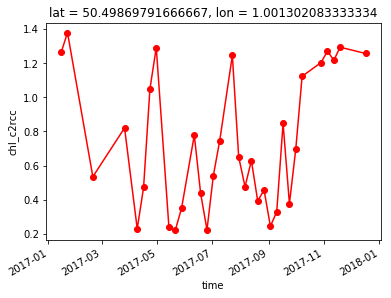

In [22]:
chl_w_ts_clean.plot.line('r-o')

In [23]:
chl_w_ts_clean.sel(time='2018-08-16', method='nearest')

<xarray.DataArray 'chl_c2rcc' ()>
array(1.256888)
Coordinates:
    time     datetime64[ns] 2017-12-17
    lat      float64 50.5
    lon      float64 1.001

In [24]:
chl_w_ts_clean.sel(time='2017-08-14', method='nearest', tolerance='1D')

<xarray.DataArray 'chl_c2rcc' ()>
array(0.629414)
Coordinates:
    time     datetime64[ns] 2017-08-13
    lat      float64 50.5
    lon      float64 1.001